In [18]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_profiling
import re

import seaborn as sns
import matplotlib.pyplot as plt


from IPython.core.display import display, HTML
pd.set_option('display.max_colwidth', -1) #for all data of df to be seen
pd.options.display.max_columns = 999

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Custome functions

def wrap(text, num_of_words=3):
    new_list = []
    
    for i, w in enumerate(text.split(" ")):
        if(i % num_of_words == (num_of_words-1)):
            new_list.append(w + '\n')
        else:
            new_list.append(w + ' ')
    return ''.join(new_list)

def swormplot(data, x, y, font_scale=1.5, figsize=(15,6), kwargs_plot={}, kwargs_label={}):
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    pl = sns.swarmplot(x=x, y=y, data=data, **kwargs_plot)
    pl.set(**kwargs_label);
    
def boxplot(data, x, y, font_scale=1.5, figsize=(15,6), kwargs_plot={}, kwargs_label={}):
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    pl = sns.boxplot(x=x, y=y, data=data, **kwargs_plot)
    pl.set(**kwargs_label);

### Import responses

In [5]:
df = pd.read_excel('omni.xlsx')

In [5]:
df.shape

(160, 52)

In [19]:
df.head(2)

,Timestamp,Score,"1. How often do you shop online technology products (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) ?","2. How often do you shop through physical stores (offline) technology products (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) ?","3. Monthly expenditure on buying technology products (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) via physical or online stores?","4. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you research to help inform your purchasing decision ? [I browse online for the best price / reviews]","4. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you research to help inform your purchasing decision ? [I browse online and then go to the physical store in order to see the product, check prices, read comments from other users through my mobile]","4. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you research to help inform your purchasing decision ? [I browse directly in the physical store to see the product, check prices, read comments from other users through my mobile]","4. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you research to help inform your purchasing decision ? [I browse directly in the physical store to see the product and then I browse online to find the best price / reviews]","5. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you finally buy? [I browse online for the best price / reviews and finally buy online]","5. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you finally buy? [I browse online and then go to the physical store to buy the product]","5. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you finally buy? [I browse directly to the physical store for the desired product and I finally buy it through that physical store]","5. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you finally buy? [I browse the physical store and then I buy online]","5. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you finally buy? [I browse a retailer (either online or offline), only to purchase it from another one, at the same or different channel]","5. When purchasing technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products, how do you finally buy? [I purchase always from the same physical retail store]","6. Rate the importance of the drivers contributing your offline (offline meaning going to a physical store) shopping experience for technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products ? [The hangout experience- In store experience ( In store Ambience)]","6. Rate the importance of the drivers contributing your offline (offline meaning going to a physical store) shopping experience for technology (e.g. laptop & desktops, keyboard, mice, cell phones, accessories, printers, home & office automation etc.) products ? [Touch, feel of the product 

Lets rename the columns

In [7]:
new_columns = ['Timestamp', 'Score', '01_online_freq_shop', '02_physical_freq_shop', '03_Monthly_tech_spend', 
        '04_search_online_best_price', '04_online_then_physical', '04_gather_info_via_mobile', '04_offline_then_online', 
        '05_online_for_best_price', '05_search_online_buy_online', '05_search_online_buy_offline', 
        '05_search_offile_buy_offline', '05_search_offile_buy_online', '05_same_physical_store', '06_in_store_ambience', 
        '06_trials', '06_Reference', '06_instant_gratification', '06_in_store_service', '06_easy_return', '06_instore_offers', 
        '06_search_physical_buy_online', '06_buy_instore_online_price', '06_loyalty_program', '06_shopping_experience', 
        '06_avoid_online_shopping', '07_lowest_price', '07_more_brands', '07_wider_range', '07_comfort_convenience', 
        '07_trustworthy', '07_no_incidental_costs', '07_easy_return', '07_more_offers', '07_loyalty_points', 
        '07_recommender_systems', '07_delivery', '07_personalized_promotion', '07_support_chatbox', 
        '07_averse_to_offline', '08_positive_online_experience', '09_seamless_online_offline', '10_suggest_to_friend', 
        '11_online_practices_to_offline', '12_age', '13_gender', '14_marital_status', '15_occupation', 
        '16_education', '17_annually_income', '18_residence']

In [8]:
remane_col = {k: v for k, v in zip(df.columns, new_columns)}
remane_col_rev = {v: k for k, v in zip(df.columns, new_columns)}

In [20]:
df2 = df.rename(columns=remane_col)
df2.head()

,Timestamp,Score,01_online_freq_shop,02_physical_freq_shop,03_Monthly_tech_spend,04_search_online_best_price,04_online_then_physical,04_gather_info_via_mobile,04_offline_then_online,05_online_for_best_price,05_search_online_buy_online,05_search_online_buy_offline,05_search_offile_buy_offline,05_search_offile_buy_online,05_same_physical_store,06_in_store_ambience,06_trials,06_Reference,06_instant_gratification,06_in_store_service,06_easy_return,06_instore_offers,06_search_physical_buy_online,06_buy_instore_online_price,06_loyalty_program,06_shopping_experience,06_avoid_online_shopping,07_lowest_price,07_more_brands,07_wider_range,07_comfort_convenience,07_trustworthy,07_no_incidental_costs,07_easy_return,07_more_offers,07_loyalty_points,07_recommender_systems,07_delivery,07_personalized_promotion,07_support_chatbox,07_averse_to_offline,08_positive_online_experience,09_seamless_online_offline,10_suggest_to_friend,11_online_practices_to_offline,12_age,13_gender,14_marital_status,15_occupation,16_education,17_annually_income,18_residence
0,2018-04-23 00:28:57.044,1,Once a month,Once a month,51€ - 150 €,Agree strongly,Agree strongly,Agree strongly,Disagree,Agree,Agree,Agree,Disagree strongly,Disagree strongly,Disagree strongly,High,High,Low,High,High,Low,High,High,High,High,High,Very Low,Very high,Very high,Very high,Very high,Very high,Very low,Very low,High,High,High,High,High,Moderate,Very low,9,9,9,9,Millennial: 23 - 37,Female,Married with children,Employee,Master / PhD,10.001-15.000,Greece: city
1,2018-04-23 17:36:53.945,1,Rarely,Every few months,below 50 €,Agree strongly,Agree,Neither agree nor disagree,Disagree strongly,Agree,Disagree,Disagree strongly,Disagree strongly,Disagree strongly,Disagree strongly,Moderate,Low,High,High,Moderate,Very high,Very high,High,Very Low,Very Low,High,Very Low,High,High,High,Very high,Very high,Very high,Very high,Low,Low,Low,Low,Very low,High,Moderate,3,8,9,4,Millennial: 23 - 37,Female,Unmarried,Student,Master / PhD,below 10.000,Greece: suburb
2,2018-04-23 17:44:55.730,1,Rarely,Every few months,151€ - 250 €,Agree,Agree,Agree strongly,Agree,Neither agree nor disagree,Agree,Agree strongly,Agree strongly,Neither agree nor disagree,Neither agree nor disagree,Very high,Very high,High,High,High,High,Very high,High,Very high,Very high,High,Low,Very high,High,Moderate,Moderate,High,High,High,Moderate,High,High,Moderate,High,Moderate,Moderate,8,8,8,6,Millennial: 23 - 37,Female,Unmarried,Self employed / Freelancer,Bachelor,below 10.000,Greece: city
3,2018-04-23 17:54:28.586,0,Every few months,Every few months,below 50 €,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Agree strongly,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,Very high,8,8,8,8,Generation X : 38 - 57,Male,Married,Employee,Master / PhD,10.001-15.000,Greece: city
4,2018-04-23 18:28:31.691,1,Rarely,Rarely,below 50 €,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Disagree strongly,Moderate,High,Low,Low,Low,Moderate,High,High,Very high,High,Moderate,Very Low,High,High,High,High,Moderate,Moderate,High,High,Moderate,Moderate,Very low,Low,Moderate,Very low,8,4,7,8,Millennial: 23 - 37,Female,Unmarried,Self employed / Freelancer,Master / PhD,10.001-15.000,Greece: city


In [10]:
# df.rename(columns=remane_col).info()

### Convert to categorical

In [11]:
df2['01_online_freq_shop'] = pd.Categorical(list(df2['01_online_freq_shop']), 
                    categories=['Rarely', 'Every few months', 'Once a month', '2-3 times a month', 'Once a week or more'])

df2['02_physical_freq_shop'] = pd.Categorical(list(df2['02_physical_freq_shop']), 
                    categories=['Rarely', 'Every few months', 'Once a month', '2-3 times a month', 'Once a week or more'])

df2['03_Monthly_tech_spend'] = pd.Categorical(list(df2['03_Monthly_tech_spend']), 
                    categories=['below 50 €', '51€ - 150 €', '151€ - 250 €', '251€ - 350 €', '351 € +'])

df2['04_search_online_best_price'] = pd.Categorical(list(df2['04_search_online_best_price']), 
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['04_online_then_physical'] = pd.Categorical(list(df2['04_online_then_physical']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['04_gather_info_via_mobile'] = pd.Categorical(list(df2['04_gather_info_via_mobile']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['04_offline_then_online'] = pd.Categorical(list(df2['04_offline_then_online']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['05_online_for_best_price'] = pd.Categorical(list(df2['05_online_for_best_price']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['05_search_online_buy_online'] = pd.Categorical(list(df2['05_search_online_buy_online']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['05_search_online_buy_offline'] = pd.Categorical(list(df2['05_search_online_buy_offline']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['05_search_offile_buy_offline'] = pd.Categorical(list(df2['05_search_offile_buy_offline']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['05_search_offile_buy_online'] = pd.Categorical(list(df2['05_search_offile_buy_online']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['05_same_physical_store'] = pd.Categorical(list(df2['05_same_physical_store']),
    categories=['Disagree strongly', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Agree strongly'])

df2['06_in_store_ambience'] = pd.Categorical(list(df2['06_in_store_ambience']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_trials'] = pd.Categorical(list(df2['06_trials']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_Reference'] = pd.Categorical(list(df2['06_Reference']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_instant_gratification'] = pd.Categorical(list(df2['06_instant_gratification']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_in_store_service'] = pd.Categorical(list(df2['06_in_store_service']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_easy_return'] = pd.Categorical(list(df2['06_easy_return']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_instore_offers'] = pd.Categorical(list(df2['06_instore_offers']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_search_physical_buy_online'] = pd.Categorical(list(df2['06_search_physical_buy_online']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_buy_instore_online_price'] = pd.Categorical(list(df2['06_buy_instore_online_price']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_loyalty_program'] = pd.Categorical(list(df2['06_loyalty_program']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_shopping_experience'] = pd.Categorical(list(df2['06_shopping_experience']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['06_avoid_online_shopping'] = pd.Categorical(list(df2['06_avoid_online_shopping']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_lowest_price'] = pd.Categorical(list(df2['07_lowest_price']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_more_brands'] = pd.Categorical(list(df2['07_more_brands']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_wider_range'] = pd.Categorical(list(df2['07_wider_range']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_comfort_convenience'] = pd.Categorical(list(df2['07_comfort_convenience']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_trustworthy'] = pd.Categorical(list(df2['07_trustworthy']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_no_incidental_costs'] = pd.Categorical(list(df2['07_no_incidental_costs']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_easy_return'] = pd.Categorical(list(df2['07_easy_return']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_more_offers'] = pd.Categorical(list(df2['07_more_offers']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_loyalty_points'] = pd.Categorical(list(df2['07_loyalty_points']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_recommender_systems'] = pd.Categorical(list(df2['07_recommender_systems']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_delivery'] = pd.Categorical(list(df2['07_delivery']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_personalized_promotion'] = pd.Categorical(list(df2['07_personalized_promotion']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_support_chatbox'] = pd.Categorical(list(df2['07_support_chatbox']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['07_averse_to_offline'] = pd.Categorical(list(df2['07_averse_to_offline']), 
                    categories=['Very Low', 'Low', 'Moderate', 'High', 'Very high'])

df2['12_age'] = pd.Categorical(list(df2['12_age']), 
                    categories=['Millennial: 23 - 37', 'Generation X : 38 - 57', 'Baby boomer: 58 - 73'])

df2['16_education'] = pd.Categorical(list(df2['16_education']), 
            categories=['Lyceum / High school / primary', 'Technical/vocational training', 'Bachelor', 'Master / PhD'])

df2['17_annually_income'] = pd.Categorical(list(df2['17_annually_income']), 
                            categories=['below 10.000', '10.001-15.000', '15.001-25.000', '25.000 +'])

### Οverview of responses

In [12]:
pandas_profiling.ProfileReport(df, check_correlation=False)

Number of variables,52
Number of observations,160
Total Missing (%),0.0%
Total size in memory,65.1 KiB
Average record size in memory,416.5 B
Numeric,4
Categorical,46
Boolean,1
Date,1
Text (Unique),0
Rejected,0


### Cross tab descriptives

 > <b>8</b> I often choose to purchase technology products from an online retailer, based upon my positive experience from the corresponding physical retail store.

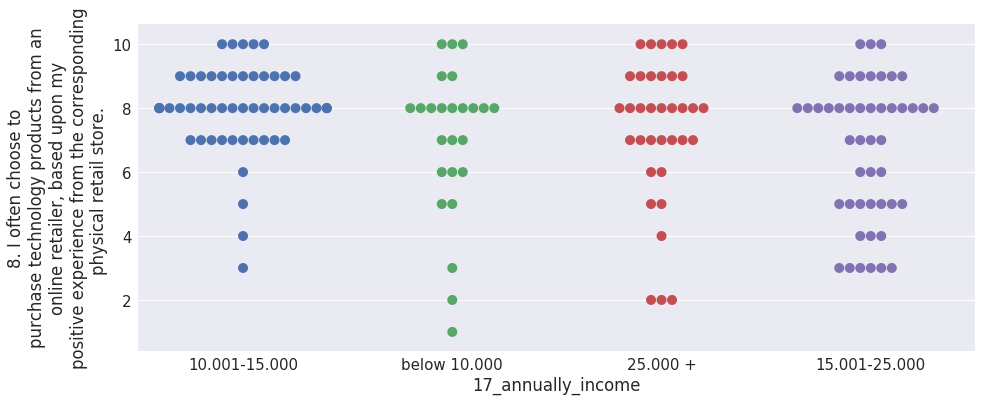

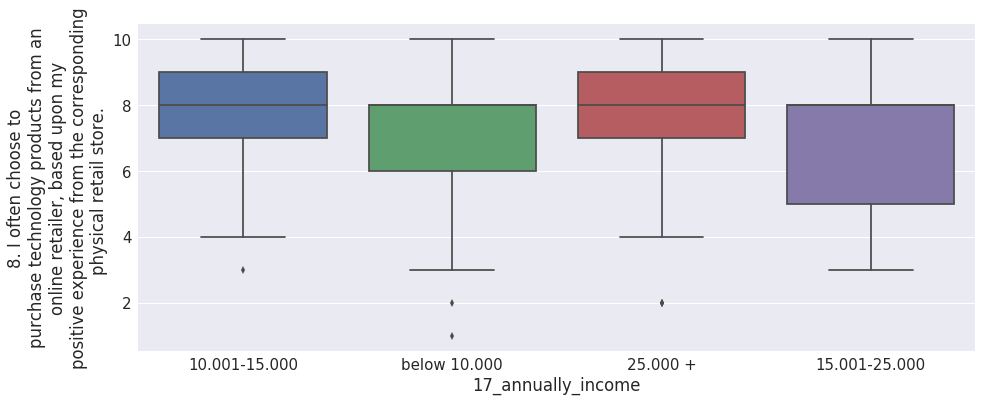

In [29]:
swormplot(data=df2, x="17_annually_income", y="08_positive_online_experience", 
         kwargs_plot={'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['08_positive_online_experience'], 5)})
# OR

boxplot(data=df2, x="17_annually_income", y="08_positive_online_experience", 
        kwargs_label={'ylabel':wrap(remane_col_rev['08_positive_online_experience'], 5)})

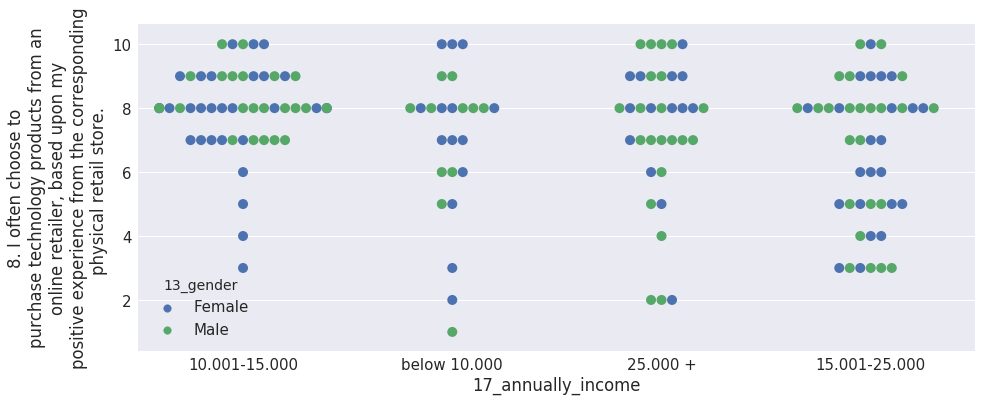

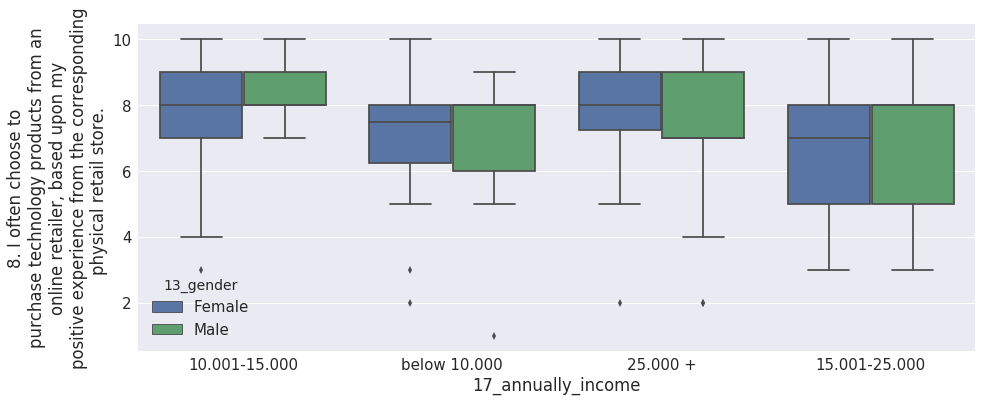

In [21]:
swormplot(data=df2, x="17_annually_income", y="08_positive_online_experience", 
         kwargs_plot={'hue':'13_gender', 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['08_positive_online_experience'], 5)})

# OR

boxplot(data=df2, x="17_annually_income", y="08_positive_online_experience", 
        kwargs_plot={'hue':'13_gender'}, 
        kwargs_label={'ylabel':wrap(remane_col_rev['08_positive_online_experience'], 5)})

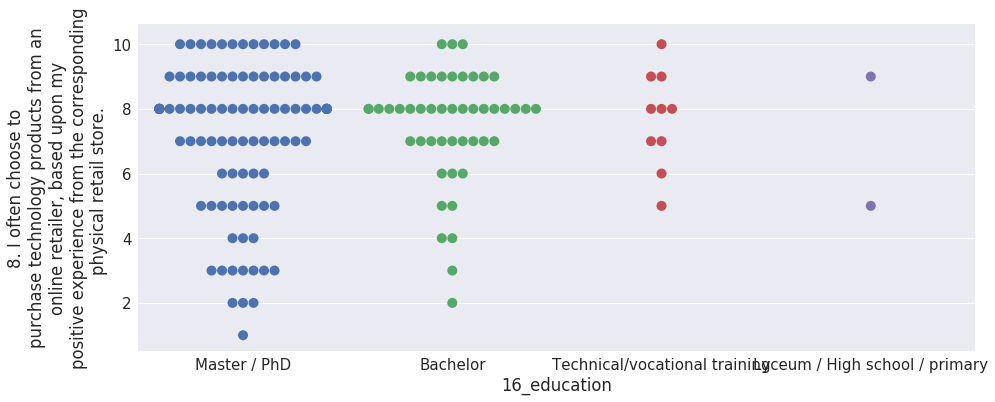

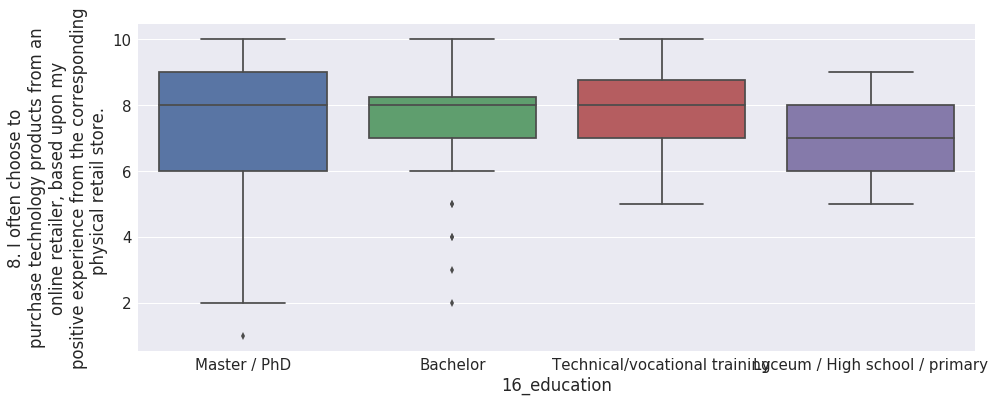

In [24]:
swormplot(data=df2, x="16_education", y="08_positive_online_experience", 
         kwargs_plot={ 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['08_positive_online_experience'], 5)})

# OR

boxplot(data=df2, x="16_education", y="08_positive_online_experience", 
        kwargs_label={'ylabel':wrap(remane_col_rev['08_positive_online_experience'], 5)})

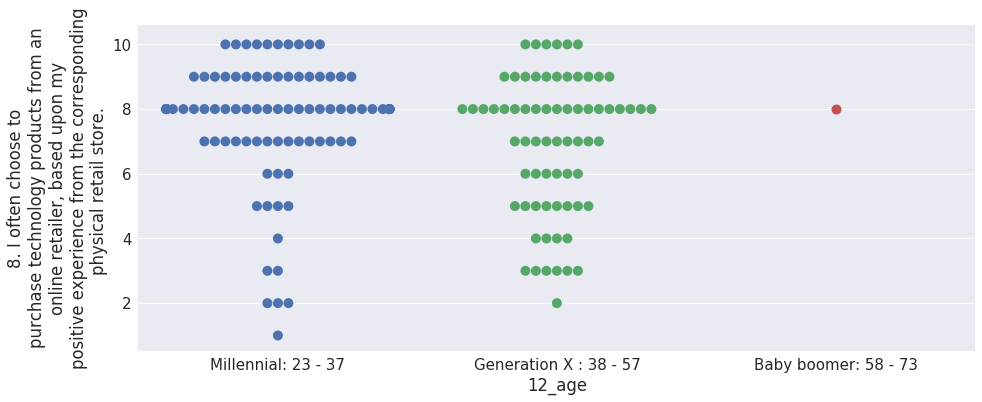

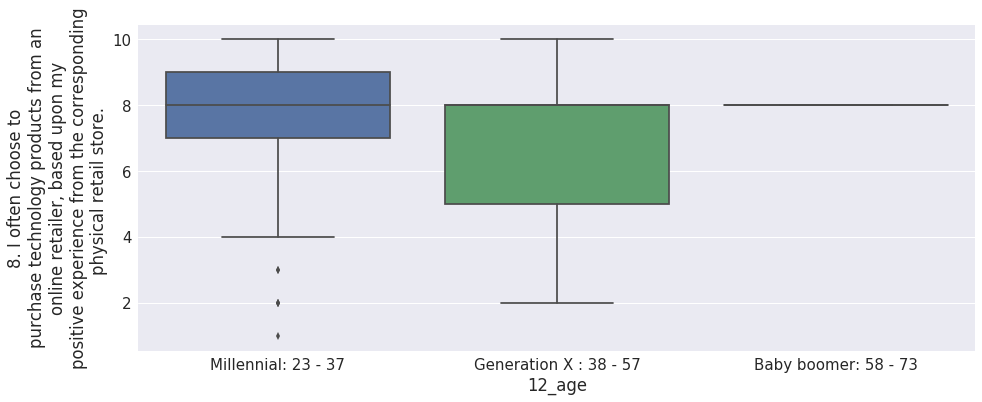

In [25]:
swormplot(data=df2, x="12_age", y="08_positive_online_experience", 
         kwargs_plot={ 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['08_positive_online_experience'], 5)})

boxplot(data=df2, x="12_age", y="08_positive_online_experience", 
        kwargs_label={'ylabel':wrap(remane_col_rev['08_positive_online_experience'], 5)})

> <b>9</b> When a retailer has a seamless shopping experience across both online and offline channels (ex. everything about the retailer feels interconnected and obvious), then I choose only him for my purchases on technology products.

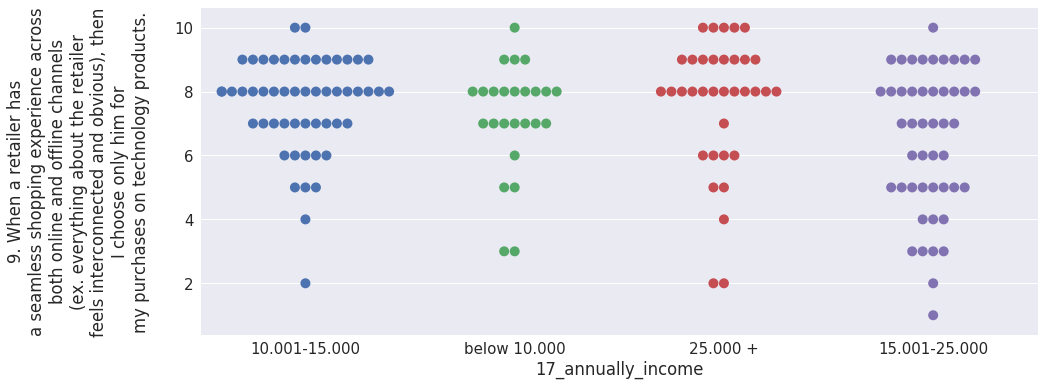

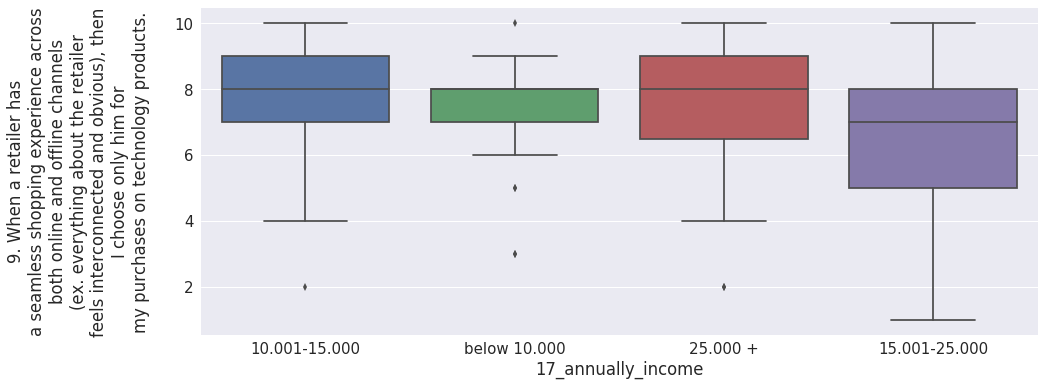

In [32]:
swormplot(data=df2, x="17_annually_income", y="09_seamless_online_offline", 
         kwargs_plot={'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['09_seamless_online_offline'], 5)})
# OR

boxplot(data=df2, x="17_annually_income", y="09_seamless_online_offline", 
        kwargs_label={'ylabel':wrap(remane_col_rev['09_seamless_online_offline'], 5)})

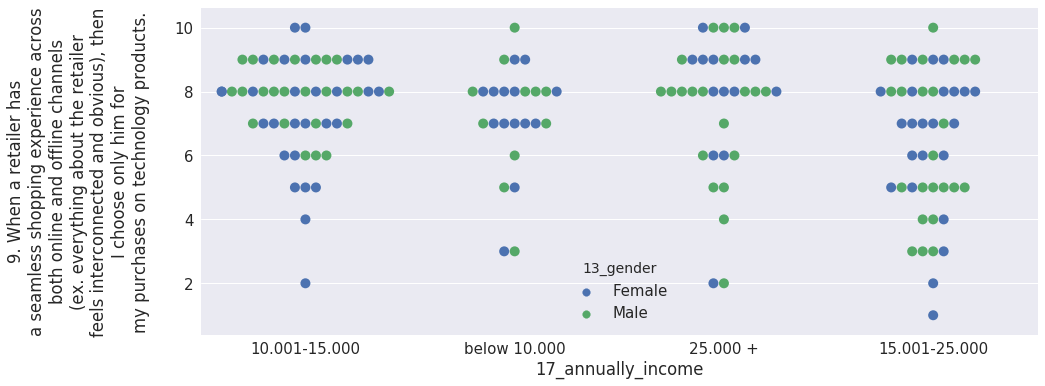

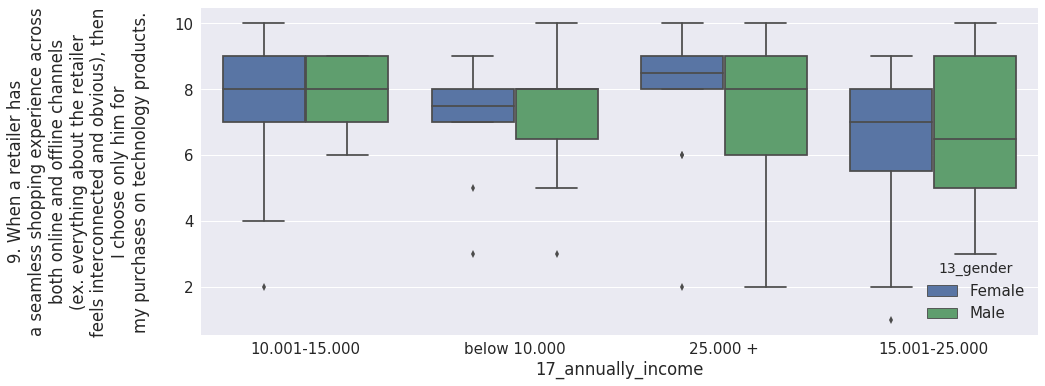

In [33]:
swormplot(data=df2, x="17_annually_income", y="09_seamless_online_offline", 
         kwargs_plot={'hue':'13_gender', 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['09_seamless_online_offline'], 5)})

# OR

boxplot(data=df2, x="17_annually_income", y="09_seamless_online_offline", 
        kwargs_plot={'hue':'13_gender'}, 
        kwargs_label={'ylabel':wrap(remane_col_rev['09_seamless_online_offline'], 5)})

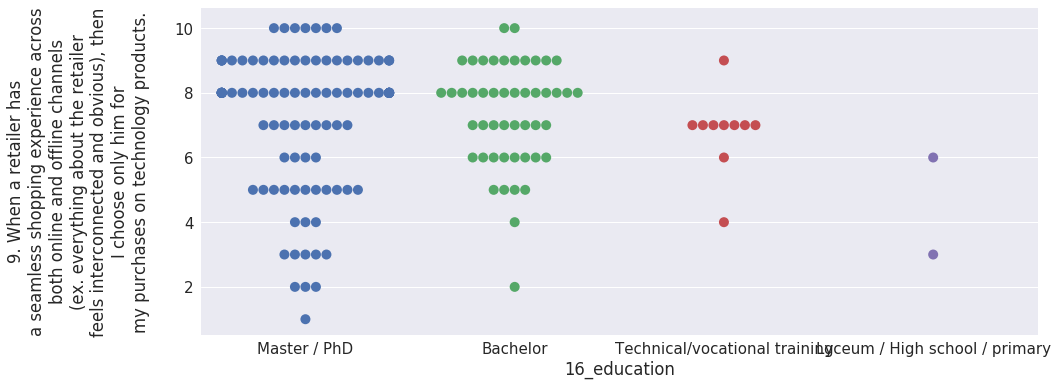

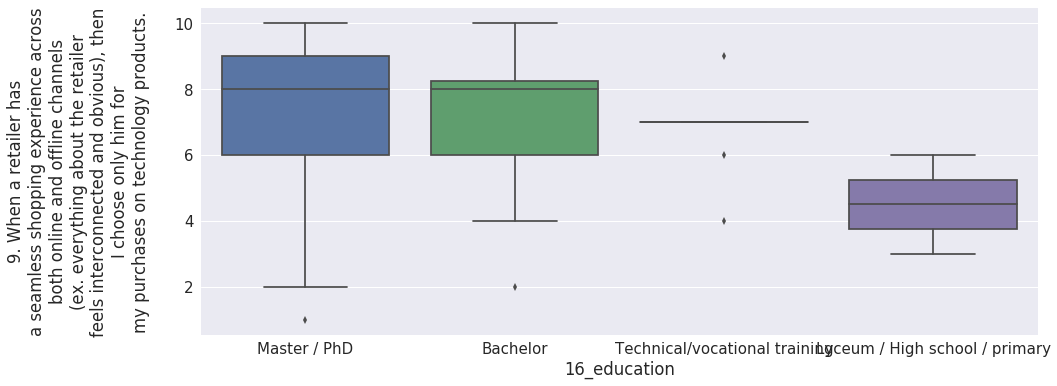

In [34]:
swormplot(data=df2, x="16_education", y="09_seamless_online_offline", 
         kwargs_plot={ 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['09_seamless_online_offline'], 5)})

# OR

boxplot(data=df2, x="16_education", y="09_seamless_online_offline", 
        kwargs_label={'ylabel':wrap(remane_col_rev['09_seamless_online_offline'], 5)})

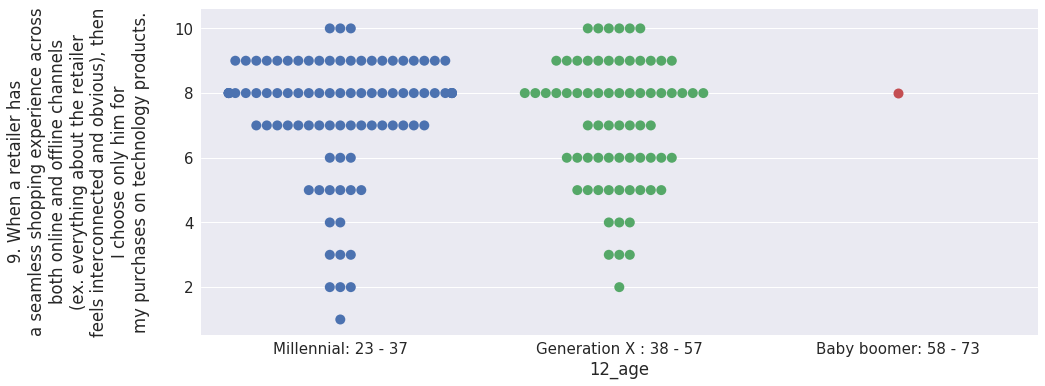

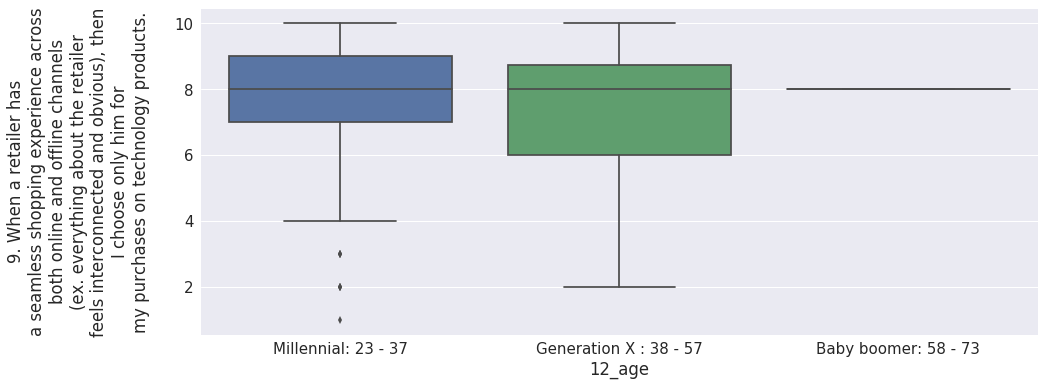

In [35]:
swormplot(data=df2, x="12_age", y="09_seamless_online_offline", 
         kwargs_plot={ 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['09_seamless_online_offline'], 5)})

boxplot(data=df2, x="12_age", y="09_seamless_online_offline", 
        kwargs_label={'ylabel':wrap(remane_col_rev['09_seamless_online_offline'], 5)})

> <b>10</b> I would suggest to a friend to buy a technology product based on my overall perception of the experience quality (both offline and online) provided by the retailer ?

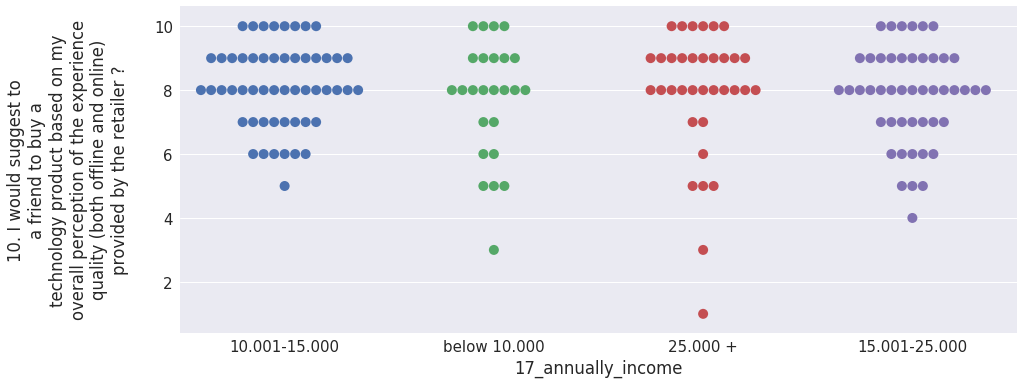

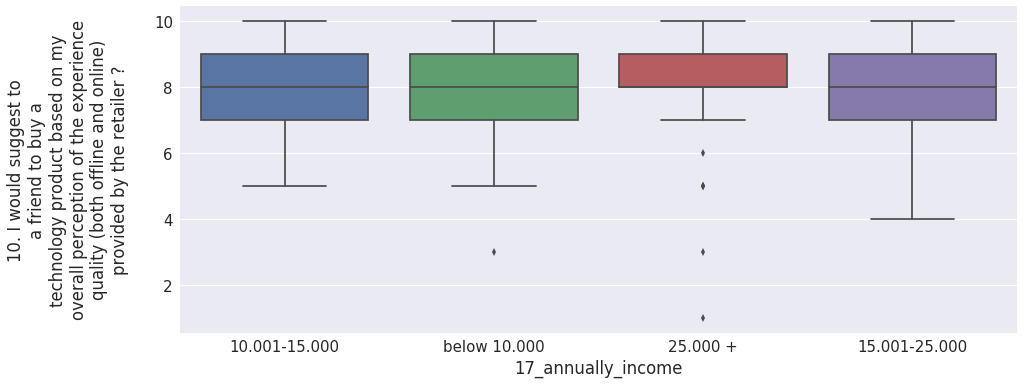

In [36]:
swormplot(data=df2, x="17_annually_income", y="10_suggest_to_friend", 
         kwargs_plot={'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['10_suggest_to_friend'], 5)})
# OR

boxplot(data=df2, x="17_annually_income", y="10_suggest_to_friend", 
        kwargs_label={'ylabel':wrap(remane_col_rev['10_suggest_to_friend'], 5)})

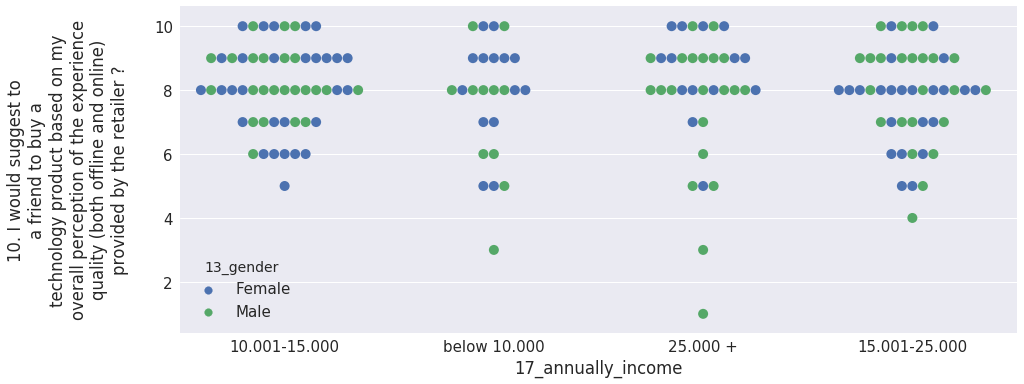

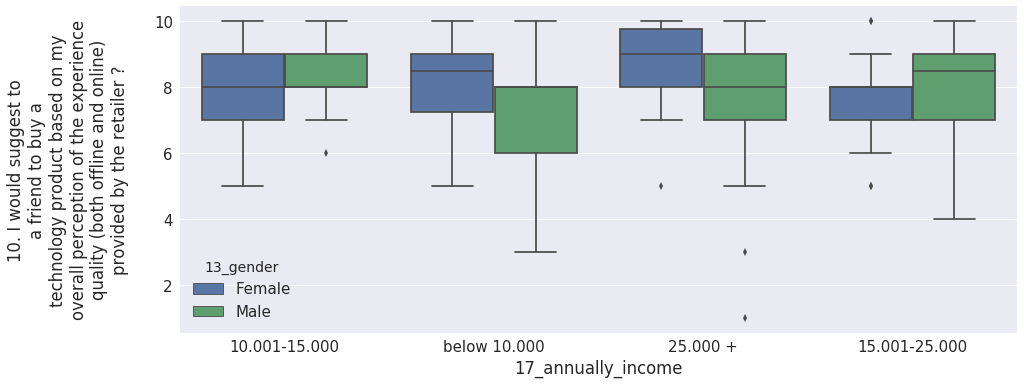

In [37]:
swormplot(data=df2, x="17_annually_income", y="10_suggest_to_friend", 
         kwargs_plot={'hue':'13_gender', 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['10_suggest_to_friend'], 5)})

# OR

boxplot(data=df2, x="17_annually_income", y="10_suggest_to_friend", 
        kwargs_plot={'hue':'13_gender'}, 
        kwargs_label={'ylabel':wrap(remane_col_rev['10_suggest_to_friend'], 5)})

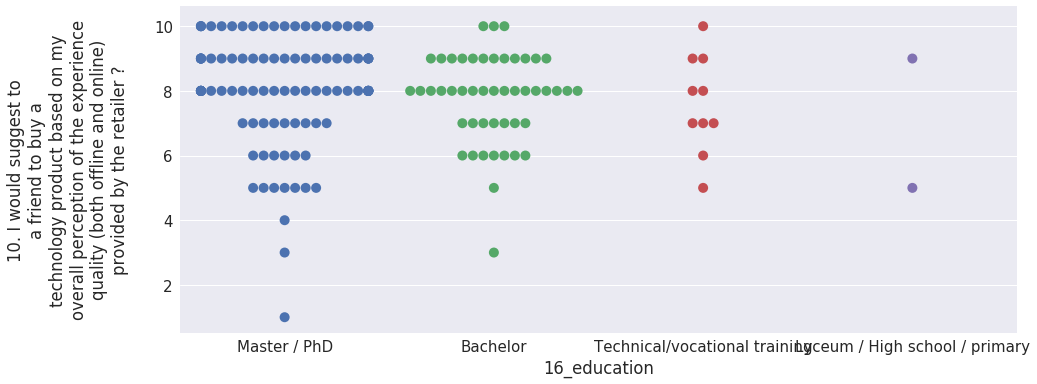

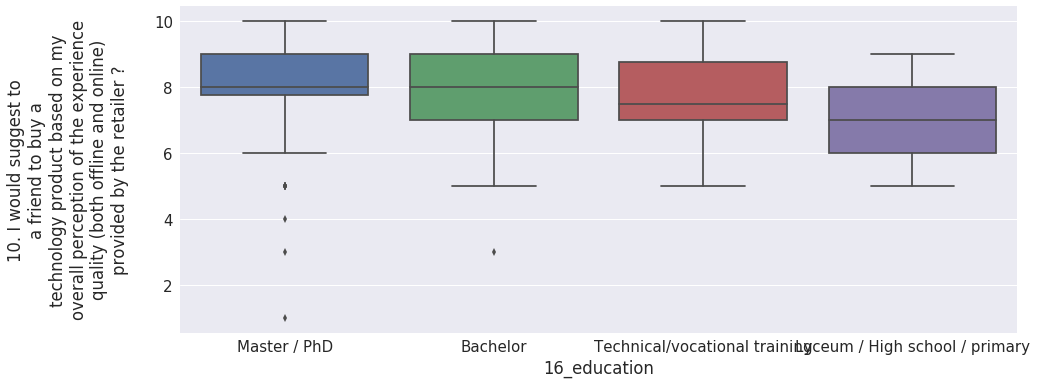

In [38]:
swormplot(data=df2, x="16_education", y="10_suggest_to_friend", 
         kwargs_plot={ 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['10_suggest_to_friend'], 5)})

# OR

boxplot(data=df2, x="16_education", y="10_suggest_to_friend", 
        kwargs_label={'ylabel':wrap(remane_col_rev['10_suggest_to_friend'], 5)})

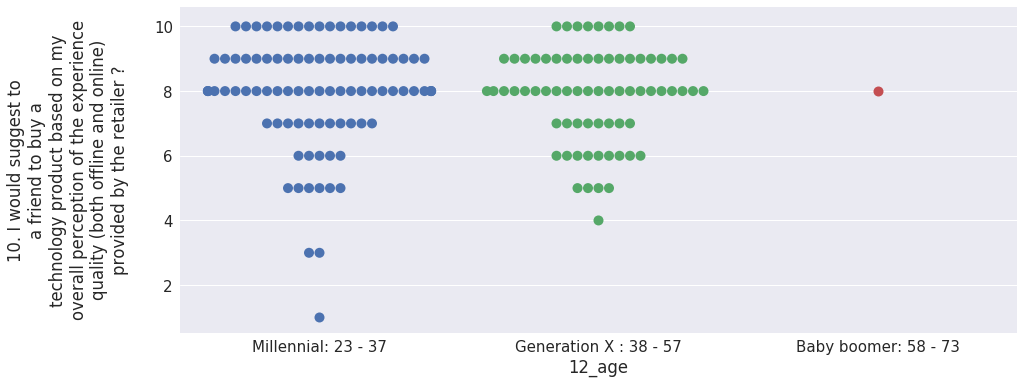

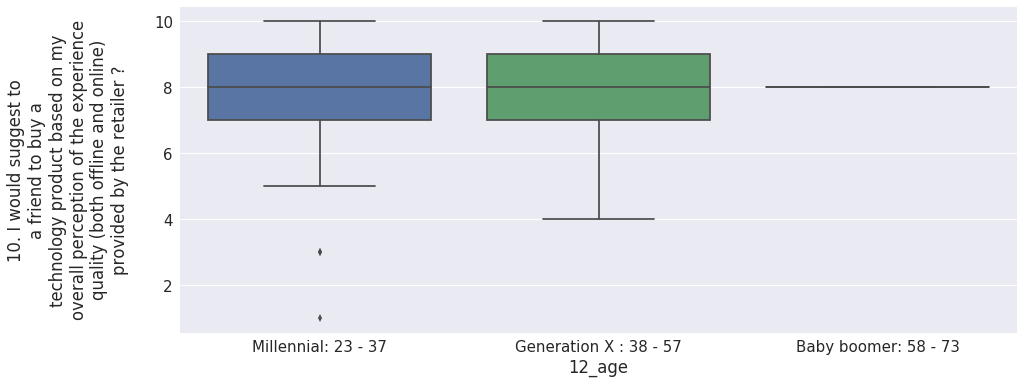

In [39]:
swormplot(data=df2, x="12_age", y="10_suggest_to_friend", 
         kwargs_plot={ 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['10_suggest_to_friend'], 5)})

boxplot(data=df2, x="12_age", y="10_suggest_to_friend", 
        kwargs_label={'ylabel':wrap(remane_col_rev['10_suggest_to_friend'], 5)})

> <b>11</b> It would be easier for me to choose and buy a technology product through a physical store if the latter has applied online practices and technologies inside the physical store. (ex. mobile payments/apps, self-service assisting technologies, product electronic search & map navigation to them)

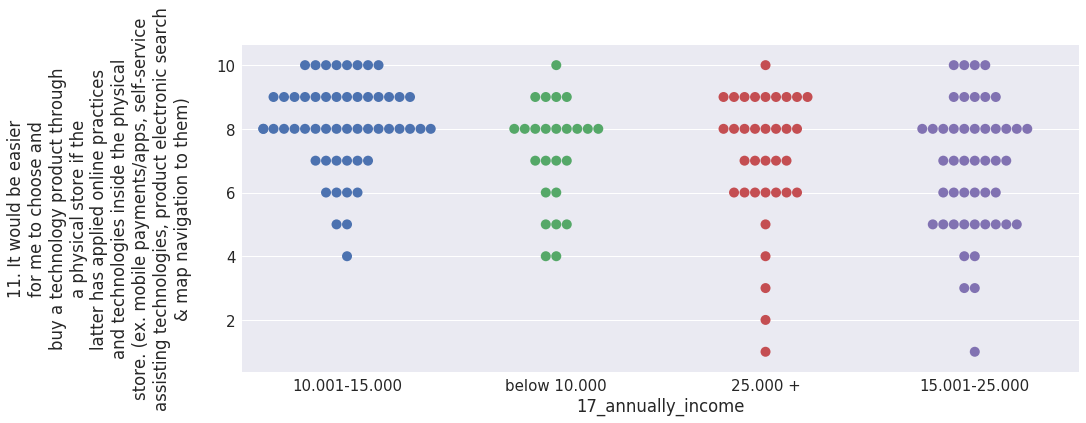

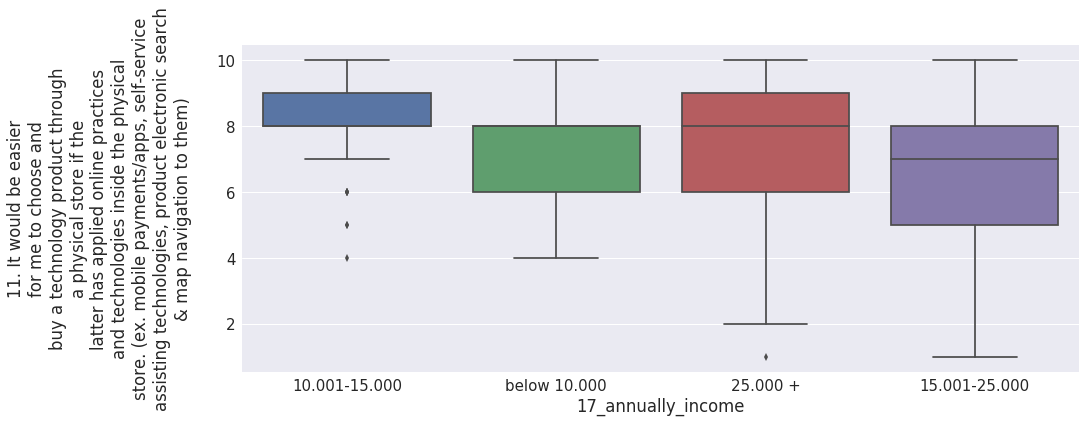

In [40]:
swormplot(data=df2, x="17_annually_income", y="11_online_practices_to_offline", 
         kwargs_plot={'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['11_online_practices_to_offline'], 5)})
# OR

boxplot(data=df2, x="17_annually_income", y="11_online_practices_to_offline", 
        kwargs_label={'ylabel':wrap(remane_col_rev['11_online_practices_to_offline'], 5)})

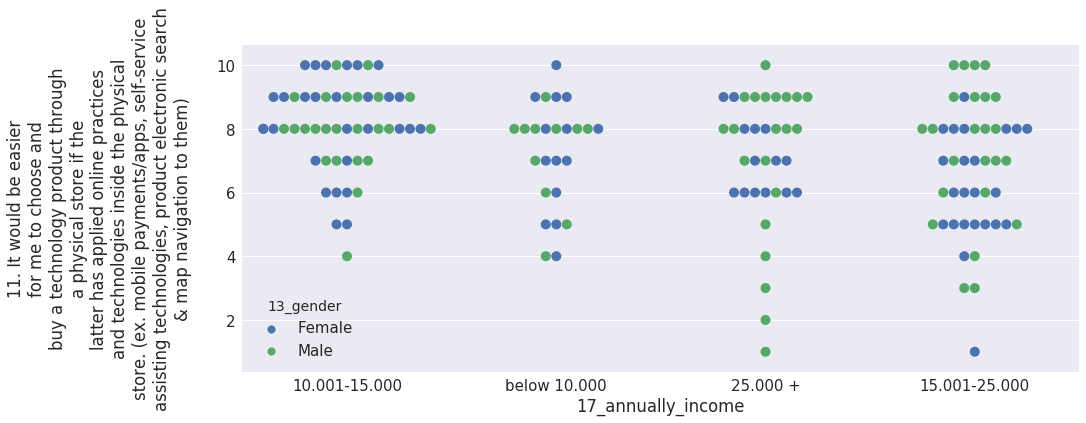

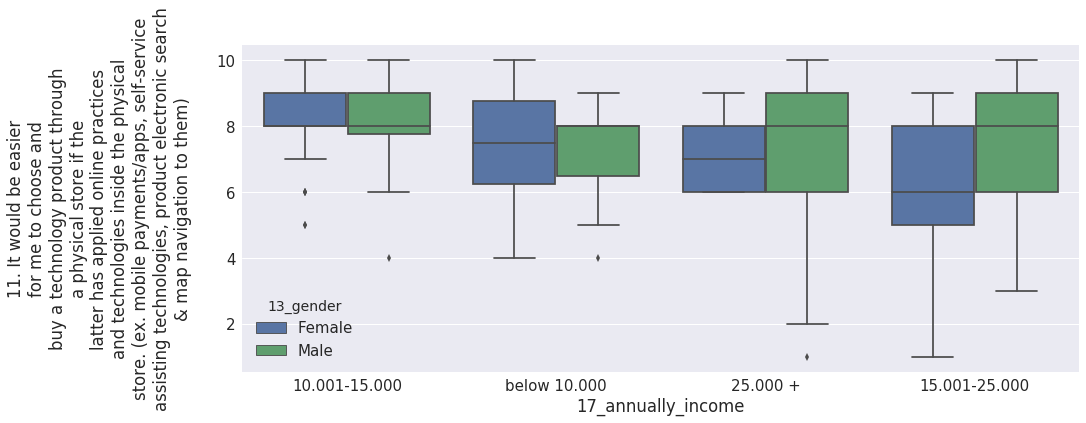

In [41]:
swormplot(data=df2, x="17_annually_income", y="11_online_practices_to_offline", 
         kwargs_plot={'hue':'13_gender', 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['11_online_practices_to_offline'], 5)})

# OR

boxplot(data=df2, x="17_annually_income", y="11_online_practices_to_offline", 
        kwargs_plot={'hue':'13_gender'}, 
        kwargs_label={'ylabel':wrap(remane_col_rev['11_online_practices_to_offline'], 5)})

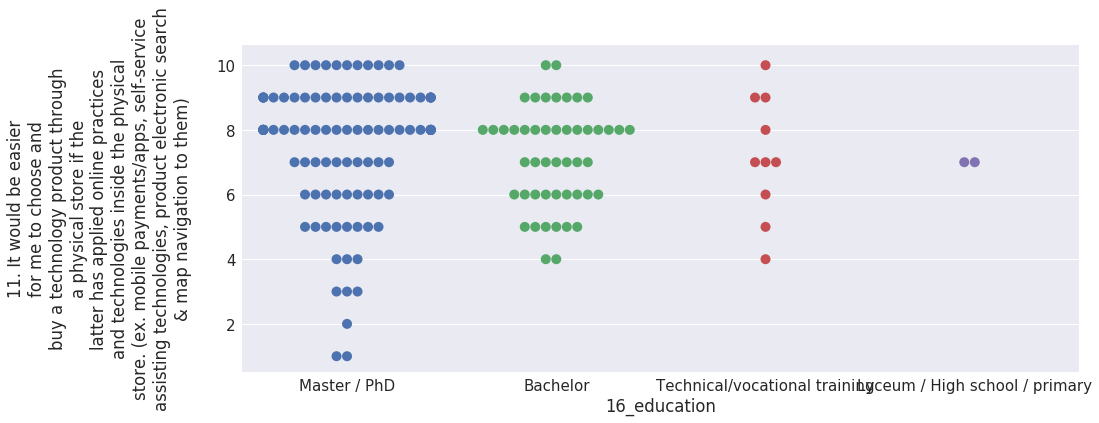

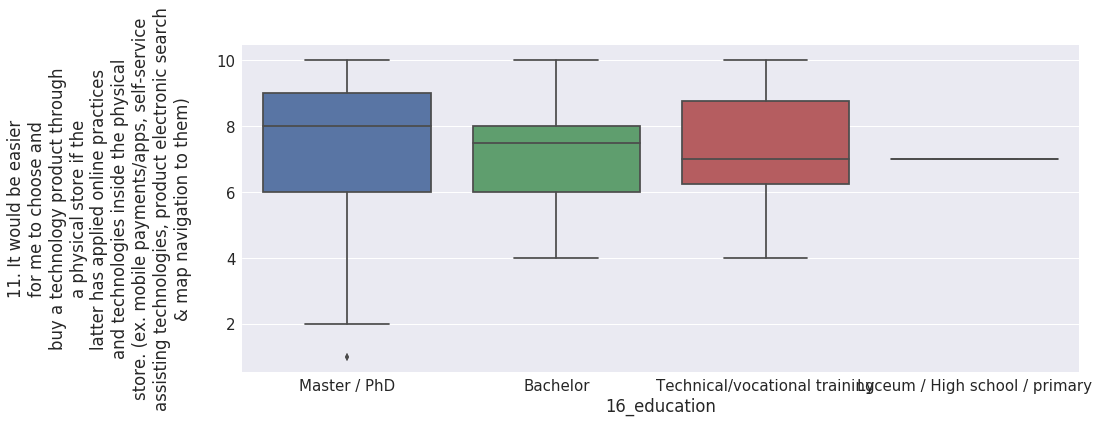

In [42]:
swormplot(data=df2, x="16_education", y="11_online_practices_to_offline", 
         kwargs_plot={ 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['11_online_practices_to_offline'], 5)})

# OR

boxplot(data=df2, x="16_education", y="11_online_practices_to_offline", 
        kwargs_label={'ylabel':wrap(remane_col_rev['11_online_practices_to_offline'], 5)})

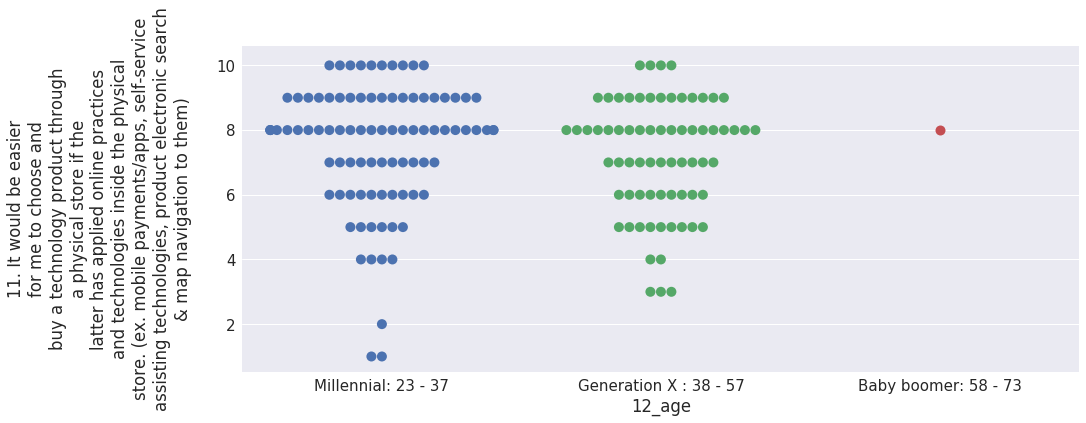

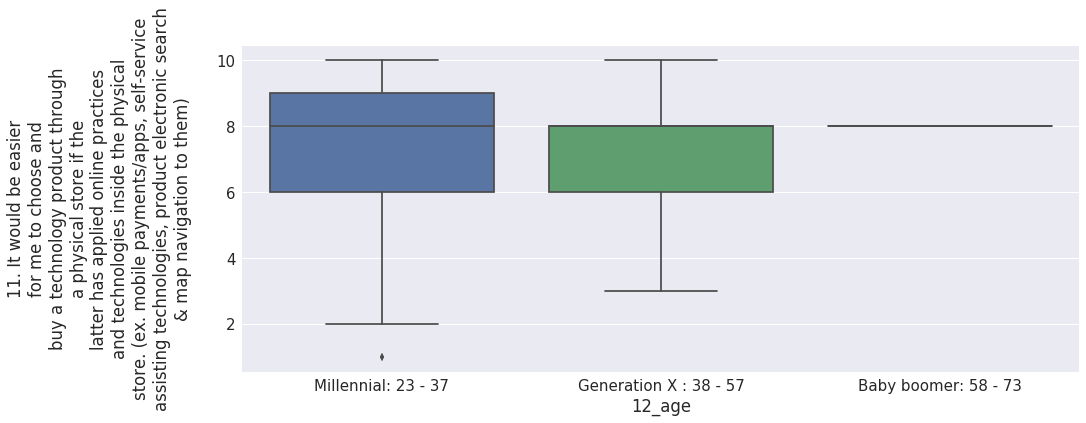

In [43]:
swormplot(data=df2, x="12_age", y="11_online_practices_to_offline", 
         kwargs_plot={ 'size': 10}, 
         kwargs_label={'ylabel':wrap(remane_col_rev['11_online_practices_to_offline'], 5)})

boxplot(data=df2, x="12_age", y="11_online_practices_to_offline", 
        kwargs_label={'ylabel':wrap(remane_col_rev['11_online_practices_to_offline'], 5)})

### Net promoters

The <b>Net Promoter Score</b> is an index ranging from `-100` to `100` that measures the willingness of customers to recommend a company's products or services to others. In the questionnaires context we will examine whether the respondent would suggest a technology product based on the overall perception of the experience quality provided by the retailer.

> <b>10</b> I would suggest to a friend to buy a technology product based on my overall perception of the experience quality (both offline and online) provided by the retailer ?

This is how we calculate the <b>Net Promoter Score</b>:

<img src='https://www.netpromoter.com/wp-content/uploads/2015/09/NPS-Definition-copy-04-copy.jpg'>

Or in a functional form: $\cfrac{Promoters - Detractors}{Total\  Respondents}$ 

In [71]:
df2['10_NPS'] = df2['10_suggest_to_friend'].apply(lambda x: 'Promoter' if x > 8 else 'Detractor' if x < 7 else 'Passive')
NPS = (df2.groupby(['10_NPS'])['10_suggest_to_friend'].count() / df2.shape[0]).to_frame()
nps = round((NPS.loc['Promoter'] - NPS.loc['Detractor']) * 100, 1)[0]

NPS = df2.groupby(['10_NPS', '17_annually_income'])['10_suggest_to_friend'].count().unstack().apply(lambda x: x/sum(x))
nps_income = round((NPS.loc['Promoter'] - NPS.loc['Detractor']) * 100, 1)

NPS = df2.groupby(['10_NPS', '16_education'])['10_suggest_to_friend'].count().unstack().apply(lambda x: x/sum(x))
nps_education = round((NPS.loc['Promoter'] - NPS.loc['Detractor']) * 100, 1)

NPS = df2.groupby(['10_NPS', '12_age'])['10_suggest_to_friend'].count().unstack().apply(lambda x: x/sum(x))
nps_age = round((NPS.loc['Promoter'] - NPS.loc['Detractor']) * 100, 1)

NPS = df2.groupby(['10_NPS', '15_occupation'])['10_suggest_to_friend'].count().unstack().apply(lambda x: x/sum(x))
nps_occupation = round((NPS.loc['Promoter'] - NPS.loc['Detractor']) * 100, 1)

NPS = df2.groupby(['10_NPS', '13_gender'])['10_suggest_to_friend'].count().unstack().apply(lambda x: x/sum(x))
nps_gender = round((NPS.loc['Promoter'] - NPS.loc['Detractor']) * 100, 1)